### Visualizations

### Injuries By Month

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import pandas as pd

In [11]:
df = pd.read_csv("injury_report_combined_years_v4.csv")
df

,Name,Team,Pos,Injury / Surgery Date,Injury / Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update,year
0,Chris Martin,BOS,RP,Jun '24,Anxiety,Activated,06/02/24,06/17/24,06/18/24,Activated,2024
1,Walker Buehler,LAD,SP,08/23/22,Tommy John surgery,Activated,03/17/24,04/07/24,05/06/24,Activated,2024
2,Shane Baz,TBR,SP,09/28/22,Tommy John surgery,Activated,03/25/24,04/09/24,05/23/24,Activated,2024
3,Lucas Gilbreath,COL,RP,03/14/23,Tommy John surgery,Activated,03/25/24,05/24/24,08/16/24,Activated,2024
4,Cade Cavalli,WSN,SP,03/22/23,Tommy John surgery,60-Day IL,03/28/24,05/27/24,NaN,No timetable for return,2024
...,...,...,...,...,...,...,...,...,...,...,...
4277,David Dahl,COL,OF,09/29/20,Shoulder surgery,45-Day IL,09/21/20,11/05/20,09/28/20,Out for 2020 season,2020
4278,Bryan Abreu,HOU,RP,09/29/20,Undisclosed,45-Day IL,09/29/20,11/13/20,09/28/20,Out for 2020 season,2020
4279,Justin Verlander,HOU,SP,09/30/20,Tommy John surgery,10-Day IL,07/25/20,08/04/20,09/28/20,Out for 2020 season,2020
4280,Ken Giles,TOR,RP,09/30/20,Tommy John surgery,10-Day IL,09/16/20,09/26/20,09/28/20,Out for 2020 season,2020


In [36]:
### Droping rows with invaild dates 
file_path = "injury_report_combined_years_v4.csv"
df = pd.read_csv(file_path)
date_format = "%Y-%m-%d" 
df['Injury / Surgery Date'] = pd.to_datetime(df['Injury / Surgery Date'], format=date_format, errors='coerce')
invalid_dates = df[df['Injury / Surgery Date'].isna()]
print("Rows with invalid dates:")
print(invalid_dates.head())
df_cleaned = df.dropna(subset=['Injury / Surgery Date'])

# Display the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned.head())

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = "injury_report_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

Rows with invalid dates:
              Name Team Pos Injury / Surgery Date    Injury / Surgery  \
0     Chris Martin  BOS  RP                   NaT             Anxiety   
1   Walker Buehler  LAD  SP                   NaT  Tommy John surgery   
2        Shane Baz  TBR  SP                   NaT  Tommy John surgery   
3  Lucas Gilbreath  COL  RP                   NaT  Tommy John surgery   
4     Cade Cavalli  WSN  SP                   NaT  Tommy John surgery   

      Status IL Retro Date Eligible to Return Return Date  \
0  Activated      06/02/24           06/17/24    06/18/24   
1  Activated      03/17/24           04/07/24    05/06/24   
2  Activated      03/25/24           04/09/24    05/23/24   
3  Activated      03/25/24           05/24/24    08/16/24   
4  60-Day IL      03/28/24           05/27/24         NaN   

             Latest Update  year  
0                Activated  2024  
1                Activated  2024  
2                Activated  2024  
3                Activated  2

In [41]:
### cleaning the data and showing the new cleaned data
file_path = "injury_report_combined_years_v4.csv"
df = pd.read_csv(file_path)
print("Original data preview:")
print(df.head())
print("\nUnique values in 'Injury / Surgery Date':")
print(df['Injury / Surgery Date'].unique())
df['Injury / Surgery Date'] = pd.to_datetime(df['Injury / Surgery Date'], errors='coerce')

# Check for rows with invalid dates
invalid_dates = df[df['Injury / Surgery Date'].isna()]
print("\nRows with invalid dates:")
print(invalid_dates)

# Drop rows with invalid dates
df_cleaned = df.dropna(subset=['Injury / Surgery Date'])

print("\nCleaned data preview:")
print(df_cleaned.head())

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = "injury_report_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

# cleaned file contains data
df_check = pd.read_csv(cleaned_file_path)
print("\nData from cleaned file:")
print(df_check.head())


Original data preview:
              Name Team Pos Injury / Surgery Date    Injury / Surgery  \
0     Chris Martin  BOS  RP               Jun '24             Anxiety   
1   Walker Buehler  LAD  SP              08/23/22  Tommy John surgery   
2        Shane Baz  TBR  SP              09/28/22  Tommy John surgery   
3  Lucas Gilbreath  COL  RP              03/14/23  Tommy John surgery   
4     Cade Cavalli  WSN  SP              03/22/23  Tommy John surgery   

      Status IL Retro Date Eligible to Return Return Date  \
0  Activated      06/02/24           06/17/24    06/18/24   
1  Activated      03/17/24           04/07/24    05/06/24   
2  Activated      03/25/24           04/09/24    05/23/24   
3  Activated      03/25/24           05/24/24    08/16/24   
4  60-Day IL      03/28/24           05/27/24         NaN   

             Latest Update  year  
0                Activated  2024  
1                Activated  2024  
2                Activated  2024  
3                Activated  202

C:\Users\alexi\AppData\Local\Temp\ipykernel_6428\293268194.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Injury / Surgery Date'] = pd.to_datetime(df['Injury / Surgery Date'], errors='coerce')


Cleaned data saved to injury_report_cleaned.csv

Data from cleaned file:
              Name Team Pos Injury / Surgery Date    Injury / Surgery  \
0   Walker Buehler  LAD  SP            2022-08-23  Tommy John surgery   
1        Shane Baz  TBR  SP            2022-09-28  Tommy John surgery   
2  Lucas Gilbreath  COL  RP            2023-03-14  Tommy John surgery   
3     Cade Cavalli  WSN  SP            2023-03-22  Tommy John surgery   
4      JT Brubaker  NYY  SP            2023-04-12  Tommy John surgery   

      Status IL Retro Date Eligible to Return Return Date  \
0  Activated      03/17/24           04/07/24    05/06/24   
1  Activated      03/25/24           04/09/24    05/23/24   
2  Activated      03/25/24           05/24/24    08/16/24   
3  60-Day IL      03/28/24           05/27/24         NaN   
4  60-Day IL      03/28/24           05/27/24         NaN   

                  Latest Update  year  
0                     Activated  2024  
1                     Activated  2024  
2

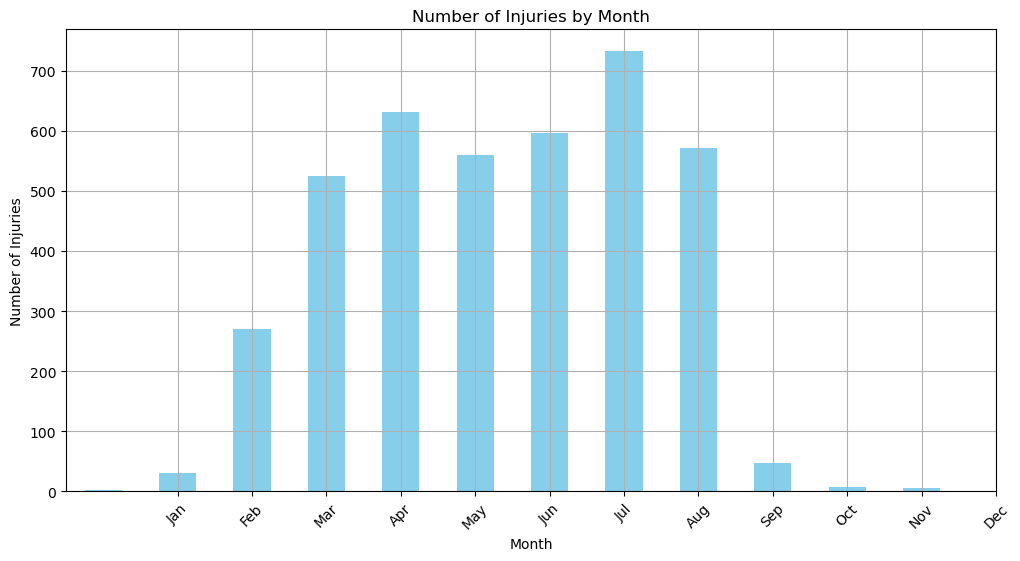

In [42]:
### Graphing the injuries by month 
cleaned_file_path = "injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)
df_cleaned['Injury / Surgery Date'] = pd.to_datetime(df_cleaned['Injury / Surgery Date'], errors='coerce')

# Extract month and year from the 'Injury / Surgery Date'
df_cleaned['Month'] = df_cleaned['Injury / Surgery Date'].dt.month
df_cleaned['Year'] = df_cleaned['Injury / Surgery Date'].dt.year

# Group by month and count the number of injuries
monthly_injuries = df_cleaned.groupby('Month').size()

# Plotting the data
plt.figure(figsize=(12, 6))
monthly_injuries.plot(kind='bar', color='skyblue')
plt.title('Number of Injuries by Month')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.grid(True)
plt.show()

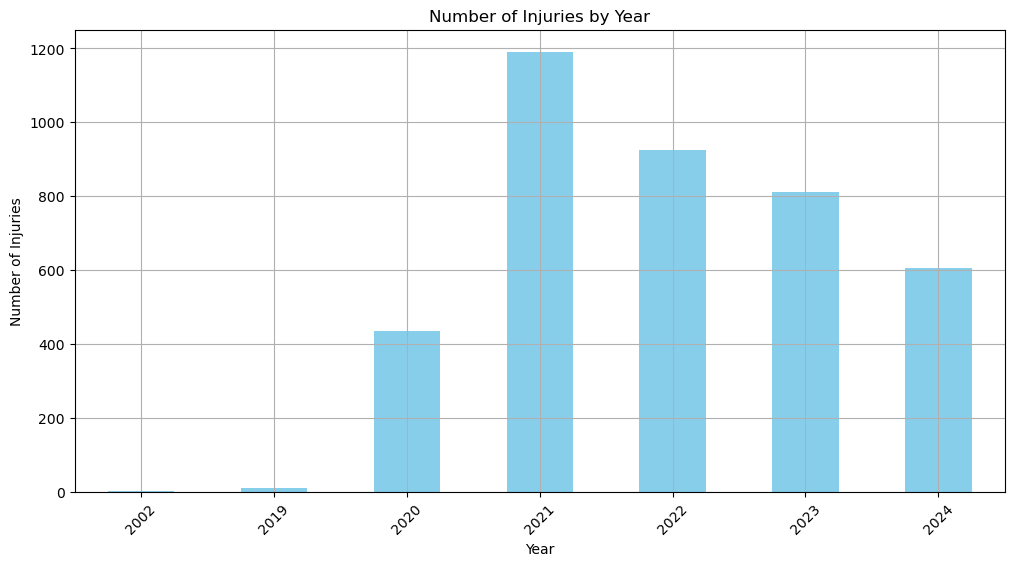

In [43]:
### Graphing injuries by year
cleaned_file_path = "injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)
df_cleaned['Injury / Surgery Date'] = pd.to_datetime(df_cleaned['Injury / Surgery Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Injury / Surgery Date'].dt.year

# Group by year and count the number of injuries
yearly_injuries = df_cleaned.groupby('Year').size()

# Plotting the data
plt.figure(figsize=(12, 6))
yearly_injuries.plot(kind='bar', color='skyblue')
plt.title('Number of Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

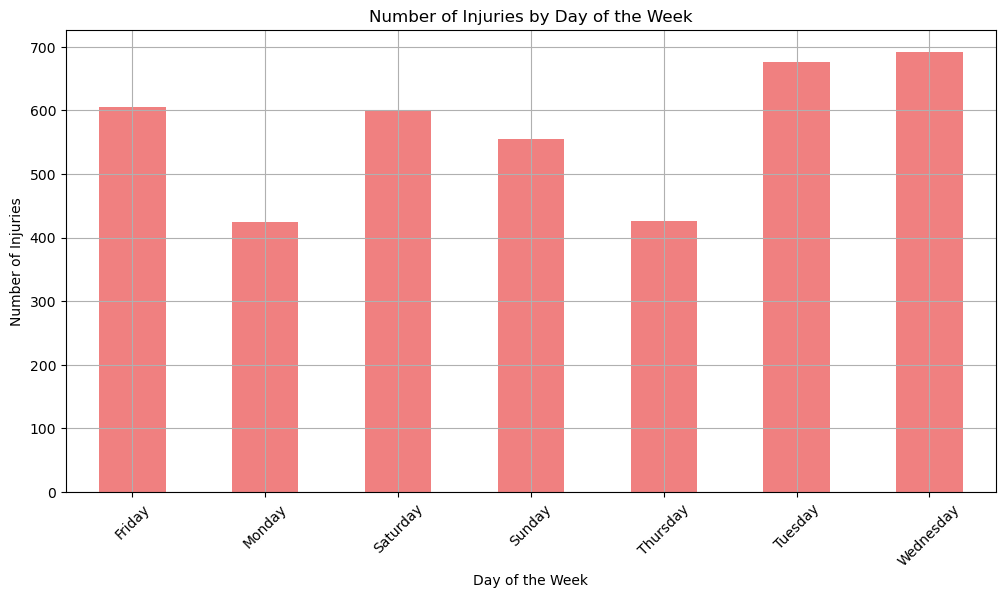

In [46]:
### injuries by day of week
df_cleaned['Day of Week'] = df_cleaned['Injury / Surgery Date'].dt.day_name()
weekly_injuries = df_cleaned.groupby('Day of Week').size()

plt.figure(figsize=(12, 6))
weekly_injuries.plot(kind='bar', color='lightcoral')
plt.title('Number of Injuries by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Specific injuries on the body

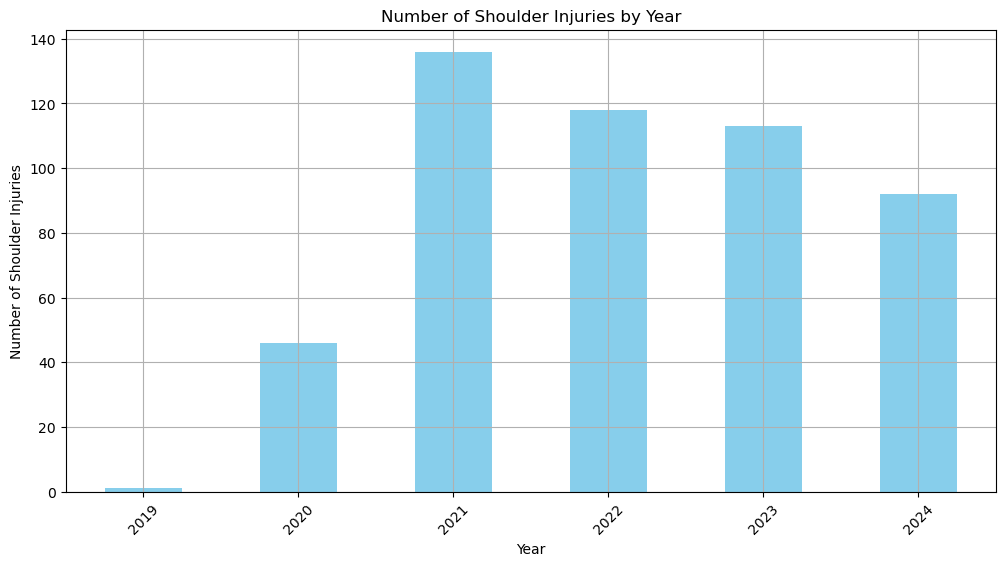

In [71]:
### Shoulder
cleaned_file_path = "injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)

# Convert 'Injury / Surgery Date' to datetime
df_cleaned['Injury / Surgery Date'] = pd.to_datetime(df_cleaned['Injury / Surgery Date'], errors='coerce')

# Filter for shoulder injuries
shoulder_injuries = df_cleaned[df_cleaned['Injury / Surgery'].str.contains('shoulder', case=False, na=False)].copy()
shoulder_injuries.loc[:, 'Year'] = shoulder_injuries['Injury / Surgery Date'].dt.year

# Count the number of shoulder injuries by year
shoulder_injuries_by_year = shoulder_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
shoulder_injuries_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Shoulder Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shoulder Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

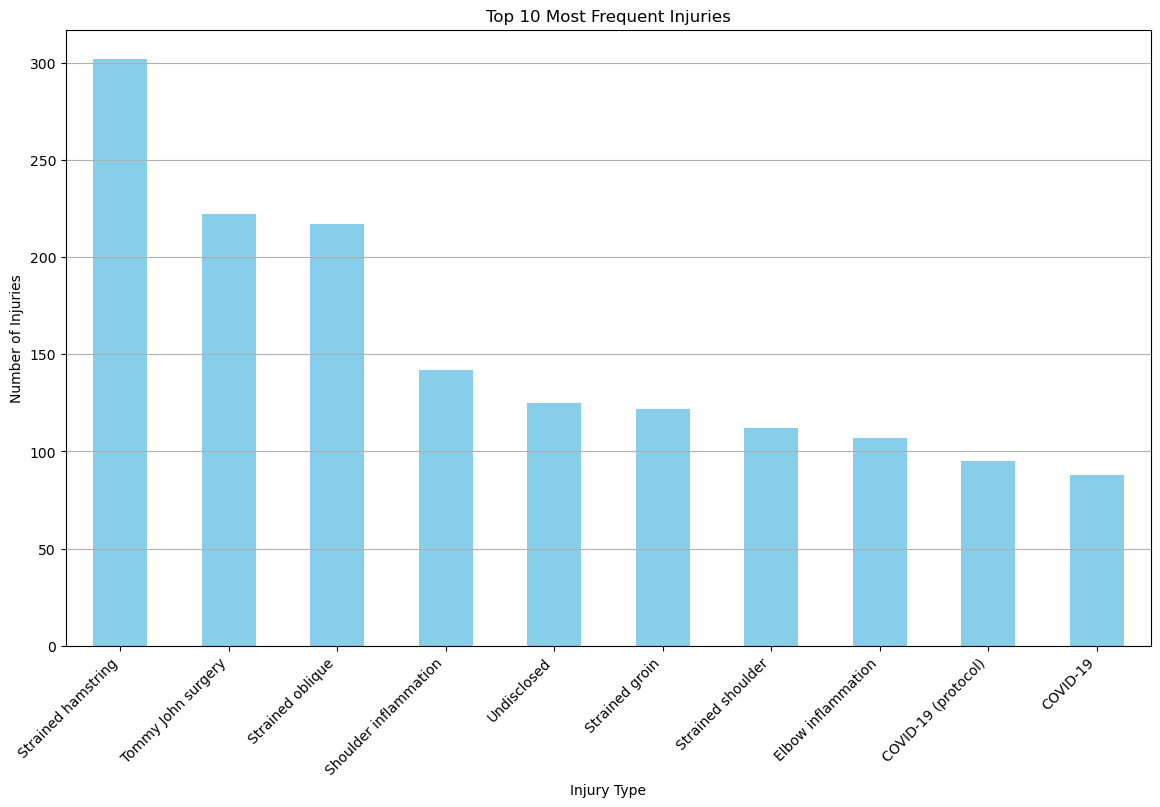

In [75]:
# cleaned CSV file
cleaned_file_path = "injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)

# Count the frequency of each injury type
injury_counts = df_cleaned['Injury / Surgery'].value_counts()

# Get the top 10 injuries
top_10_injuries = injury_counts.head(10)

# Plotting the data
plt.figure(figsize=(14, 8))
top_10_injuries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Injuries')
plt.xlabel('Injury Type')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

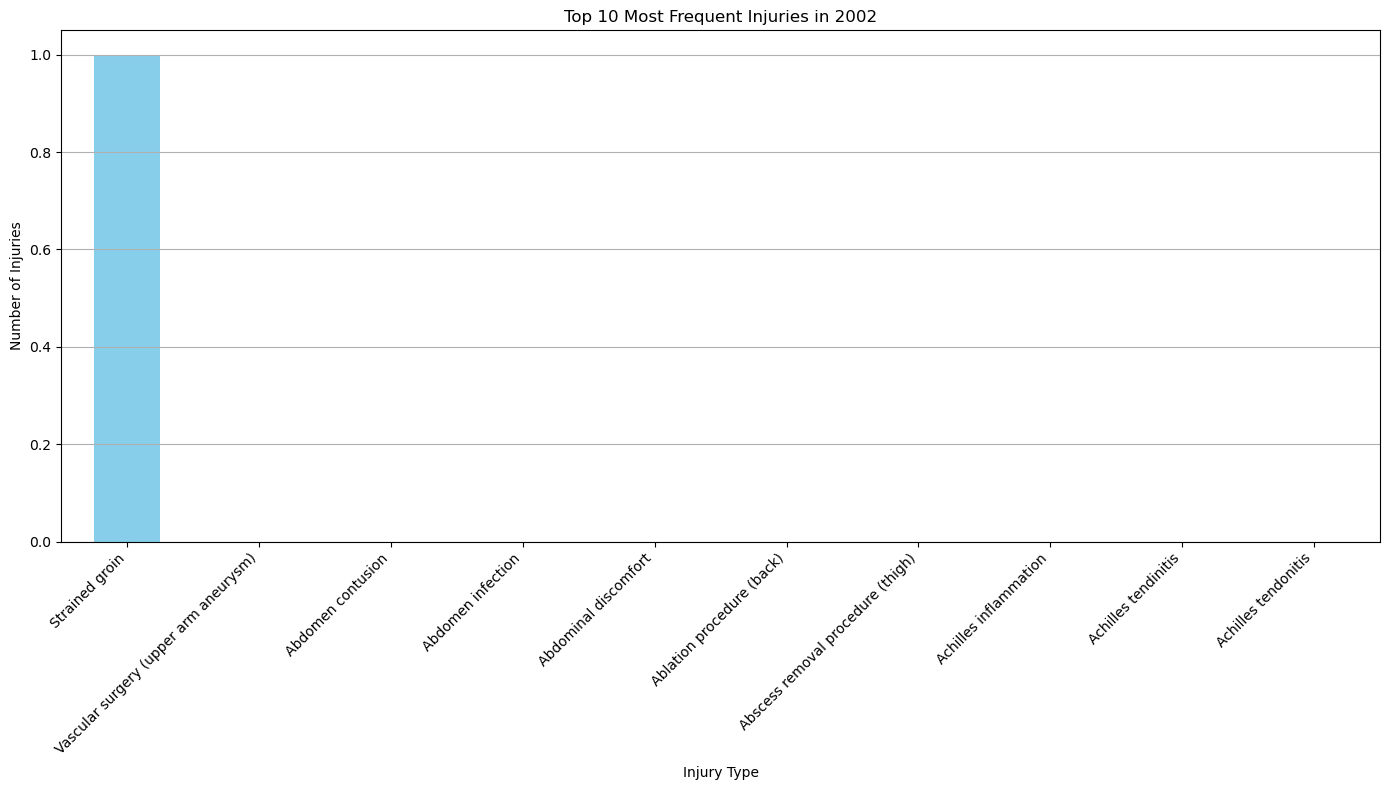

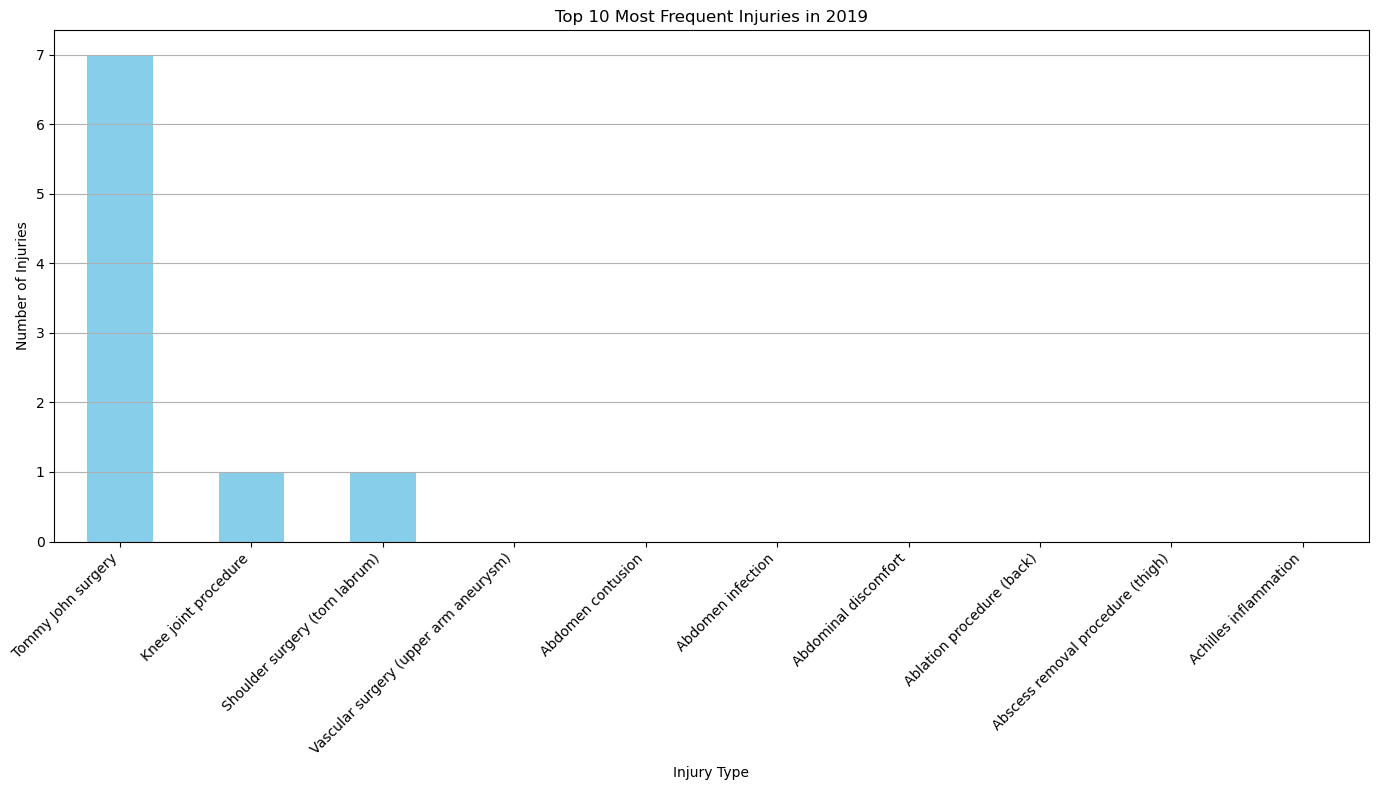

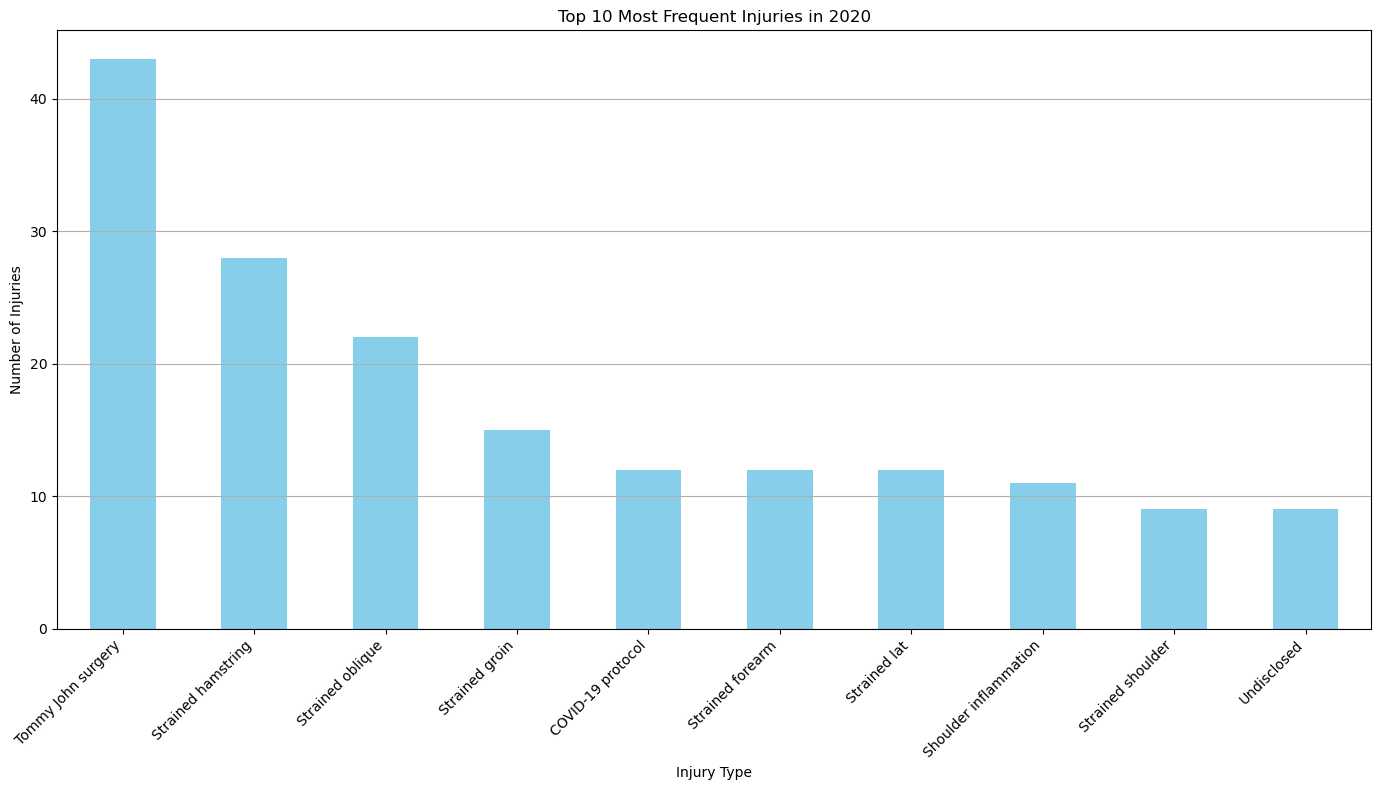

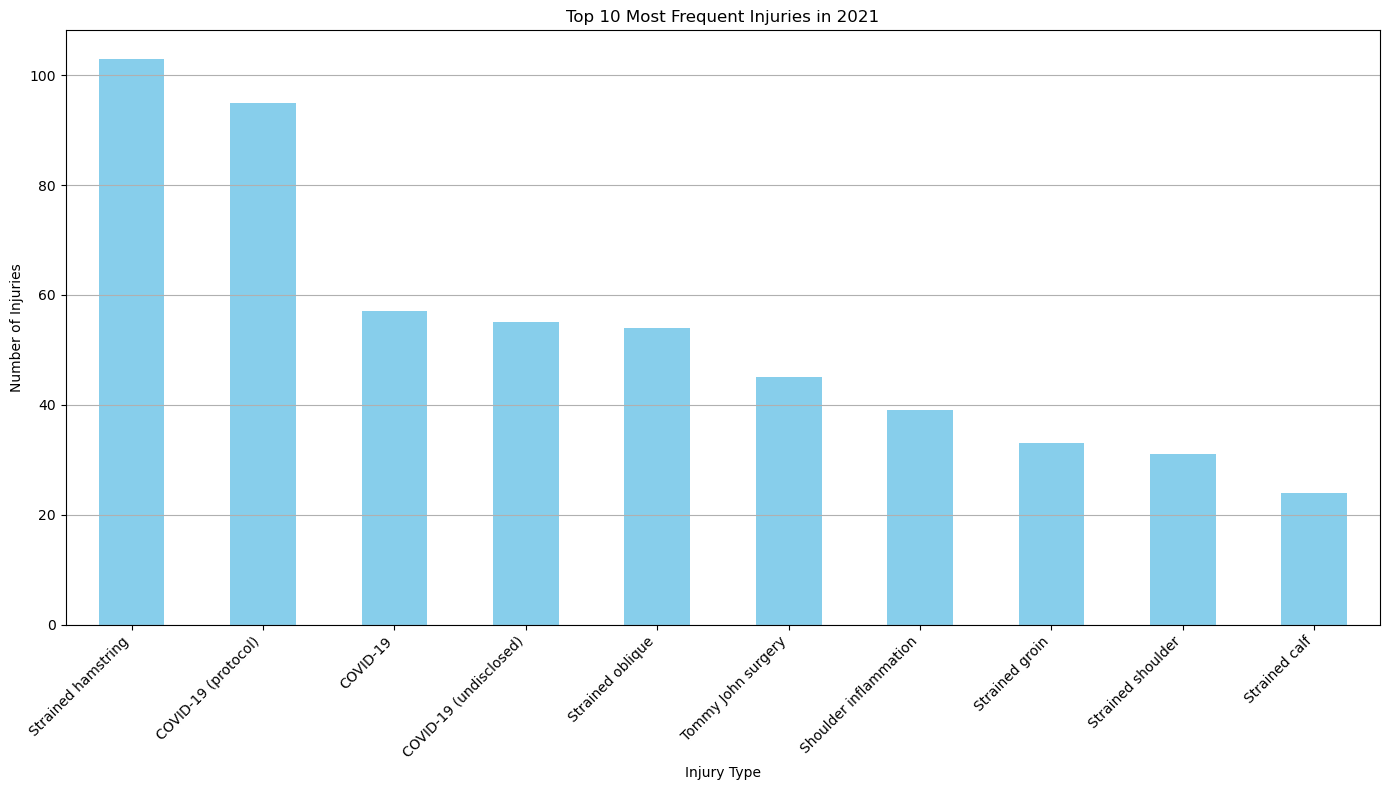

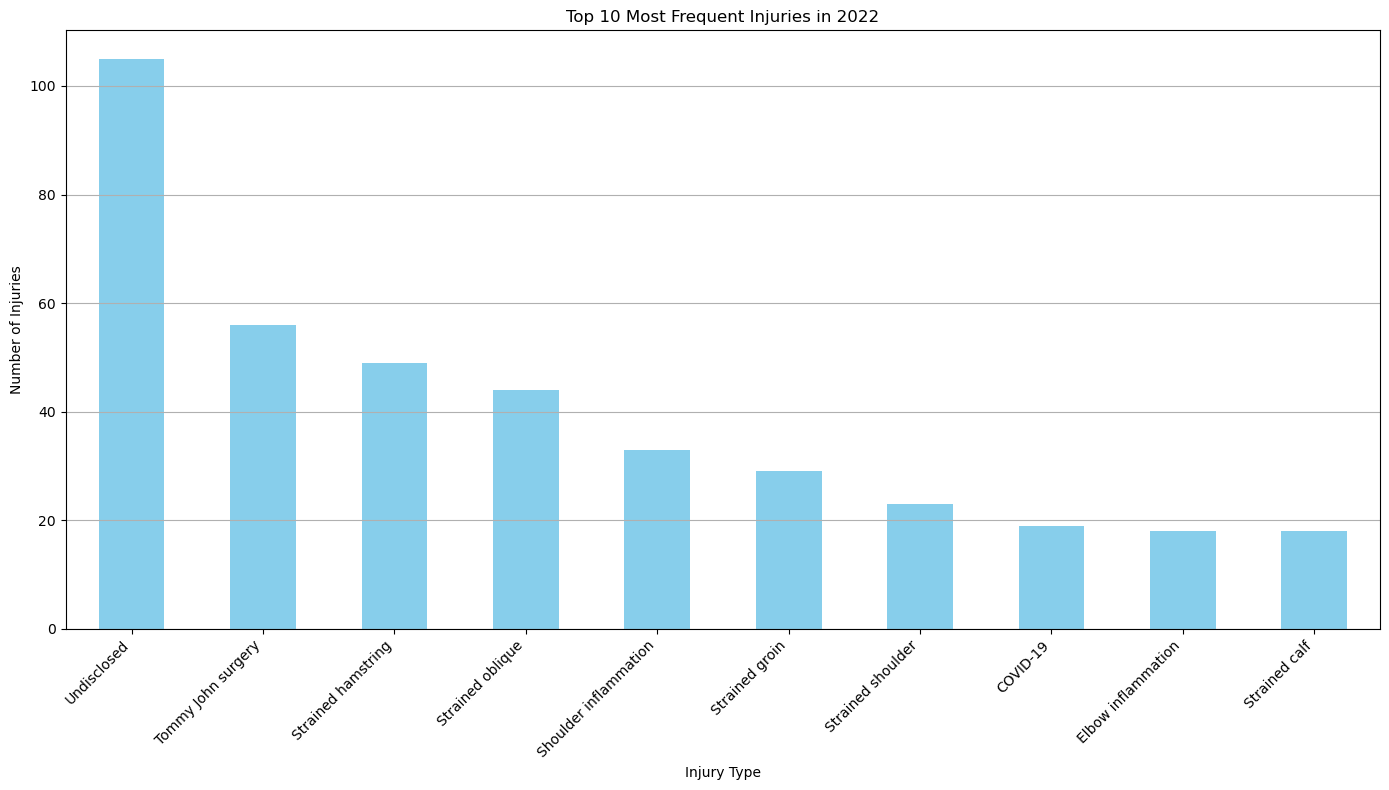

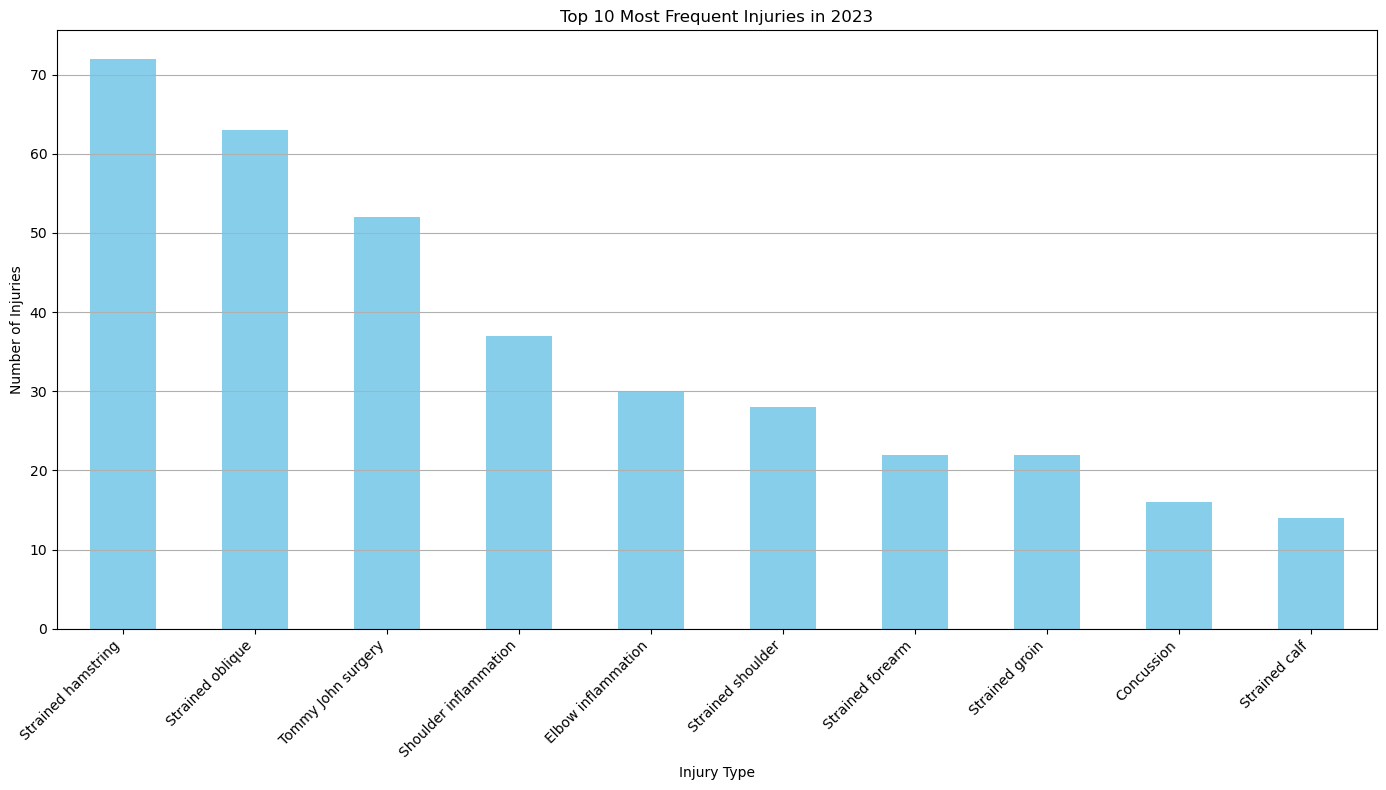

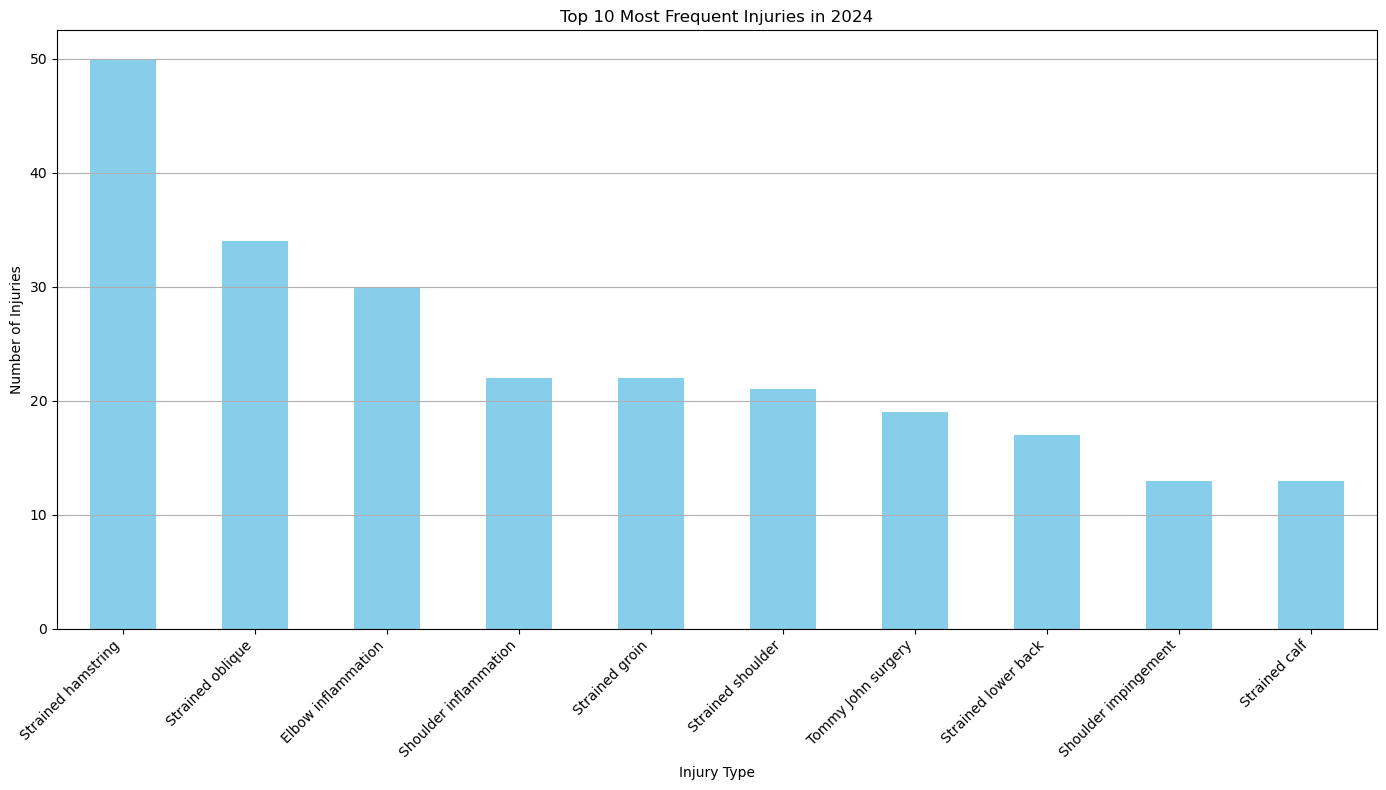

In [53]:
cleaned_file_path = "injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)
df_cleaned['Injury / Surgery Date'] = pd.to_datetime(df_cleaned['Injury / Surgery Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Injury / Surgery Date'].dt.year

# Count the frequency of each injury type for each year
injury_counts_by_year = df_cleaned.groupby('Year')['Injury / Surgery'].value_counts().unstack()

# Plot the top 10 injuries for each year
for year in injury_counts_by_year.index:
    # Get the injury counts for the current year
    injury_counts = injury_counts_by_year.loc[year]
    
    # Get the top 10 injuries
    top_10_injuries = injury_counts.nlargest(10)
    
    # Plotting the data
    plt.figure(figsize=(14, 8))
    top_10_injuries.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Most Frequent Injuries in {year}')
    plt.xlabel('Injury Type')
    plt.ylabel('Number of Injuries')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [58]:
df = pd.read_csv("CombinedBPI.csv")
df

,player_id,year_x,player_age,hit,single,double,triple,home_run,strikeout,walk,...,Team,Pos,Injury / Surgery Date,Injury / Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update,year_y
0,408234,2020,37,51,37,4,0,10,51,24,...,DET,1B,09/02/22,Strained biceps,Activated,09/03/22,09/13/22,09/19/22,Activated,2022.0
1,408234,2020,37,51,37,4,0,10,51,24,...,DET,1B,04/10/21,Strained biceps,Activated,04/11/21,04/21/21,04/25/21,Activated,2021.0
2,443558,2020,39,56,34,6,0,16,58,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,444482,2020,32,61,45,10,1,5,45,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,446334,2020,34,49,31,10,1,7,39,11,...,ARI,3B,07/25/23,Strained lower back,Activated,07/26/23,08/05/23,08/21/23,Activated,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,686752,2024,26,83,52,14,2,15,114,38,...,LAD,SP,03/28/23,Strained oblique,Activated,03/29/23,05/28/23,08/02/23,Activated,2023.0
3547,687765,2024,26,129,79,31,3,16,105,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3548,690986,2024,22,118,76,24,1,17,115,41,...,SFG,SP,06/16/24,Sprained ankle,Activated,06/13/24,06/28/24,07/06/24,Activated,2024.0
3549,694297,2024,25,157,107,25,6,19,155,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Cleaning data to get rid of "NaN"
file_path = r"CombinedBPI.csv"
df = pd.read_csv(file_path)

# Drop rows with any NaN values
df_cleaned = df.dropna()

# save the cleaned DataFrame to a new CSV file
cleaned_file_path = r"C:\Users\alexi\Desktop\CombinedBPI_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

# Print the first few rows of the cleaned DataFrame to confirm
print(df_cleaned.head())

Cleaned data saved to C:\Users\alexi\Desktop\CombinedBPI_cleaned.csv
   player_id  year_x  player_age  hit  single  double  triple  home_run  \
0     408234    2020          37   51      37       4       0        10   
1     408234    2020          37   51      37       4       0        10   
4     446334    2020          34   49      31      10       1         7   
5     446334    2020          34   49      31      10       1         7   
6     446334    2020          34   49      31      10       1         7   

   strikeout  walk  ...  Team  Pos  Injury / Surgery Date  \
0         51    24  ...   DET   1B               09/02/22   
1         51    24  ...   DET   1B               04/10/21   
4         39    11  ...   ARI   3B               07/25/23   
5         39    11  ...   SFG   3B               03/29/22   
6         39    11  ...   SFG   3B               07/05/22   

                   Injury / Surgery     Status IL Retro Date  \
0                   Strained biceps  Activated   

In [61]:
df_cleaned.head()

,player_id,year_x,player_age,hit,single,double,triple,home_run,strikeout,walk,...,Team,Pos,Injury / Surgery Date,Injury / Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update,year_y
0,408234,2020,37,51,37,4,0,10,51,24,...,DET,1B,09/02/22,Strained biceps,Activated,09/03/22,09/13/22,09/19/22,Activated,2022.0
1,408234,2020,37,51,37,4,0,10,51,24,...,DET,1B,04/10/21,Strained biceps,Activated,04/11/21,04/21/21,04/25/21,Activated,2021.0
4,446334,2020,34,49,31,10,1,7,39,11,...,ARI,3B,07/25/23,Strained lower back,Activated,07/26/23,08/05/23,08/21/23,Activated,2023.0
5,446334,2020,34,49,31,10,1,7,39,11,...,SFG,3B,03/29/22,Finger surgery (ligament repair),Activated,04/04/22,04/14/22,05/11/22,Activated,2022.0
6,446334,2020,34,49,31,10,1,7,39,11,...,SFG,3B,07/05/22,Strained oblique,Activated,07/06/22,07/16/22,07/16/22,Activated,2022.0


C:\Users\alexi\AppData\Local\Temp\ipykernel_6428\427131356.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


<Figure size 1400x800 with 0 Axes>

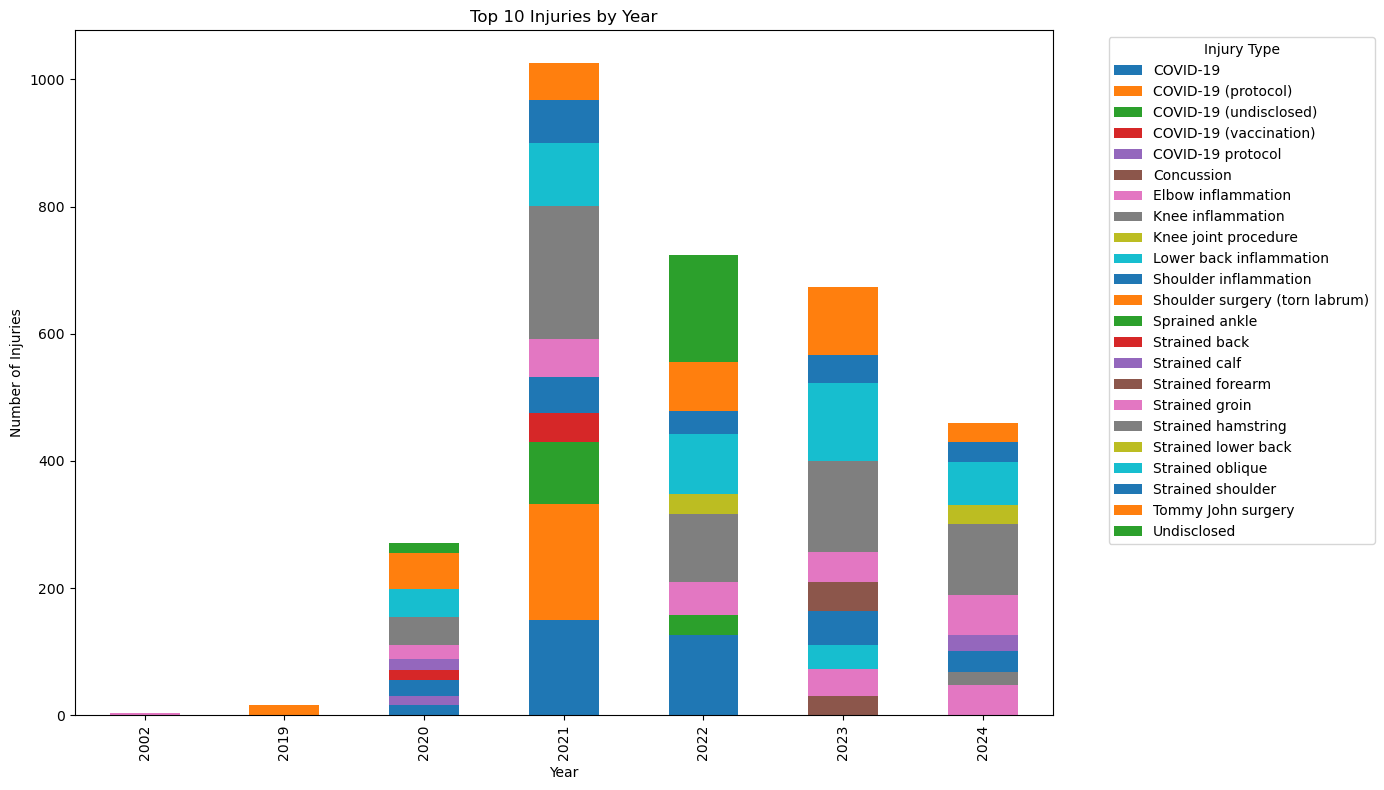

In [64]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df1_cleaned = df1.dropna(subset=['Injury / Surgery'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery'])
combined_df = pd.concat([df1_cleaned, df2_cleaned])
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')
combined_df = combined_df.dropna(subset=['Injury / Surgery Date'])
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year
injuries_by_year = combined_df.groupby(['Year', 'Injury / Surgery']).size().reset_index(name='Count')

# Get the top 10 injuries for each year
top_injuries_by_year = (injuries_by_year
                        .sort_values(['Year', 'Count'], ascending=[True, False])
                        .groupby('Year')
                        .head(10))

# Plotting the results
plt.figure(figsize=(14, 8))

# pivot table for better plotting
pivot_table = top_injuries_by_year.pivot_table(index='Year', columns='Injury / Surgery', values='Count', fill_value=0)

# Plot each injury type
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Top 10 Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Injuries based on Top 10 player status

<Figure size 1400x800 with 0 Axes>

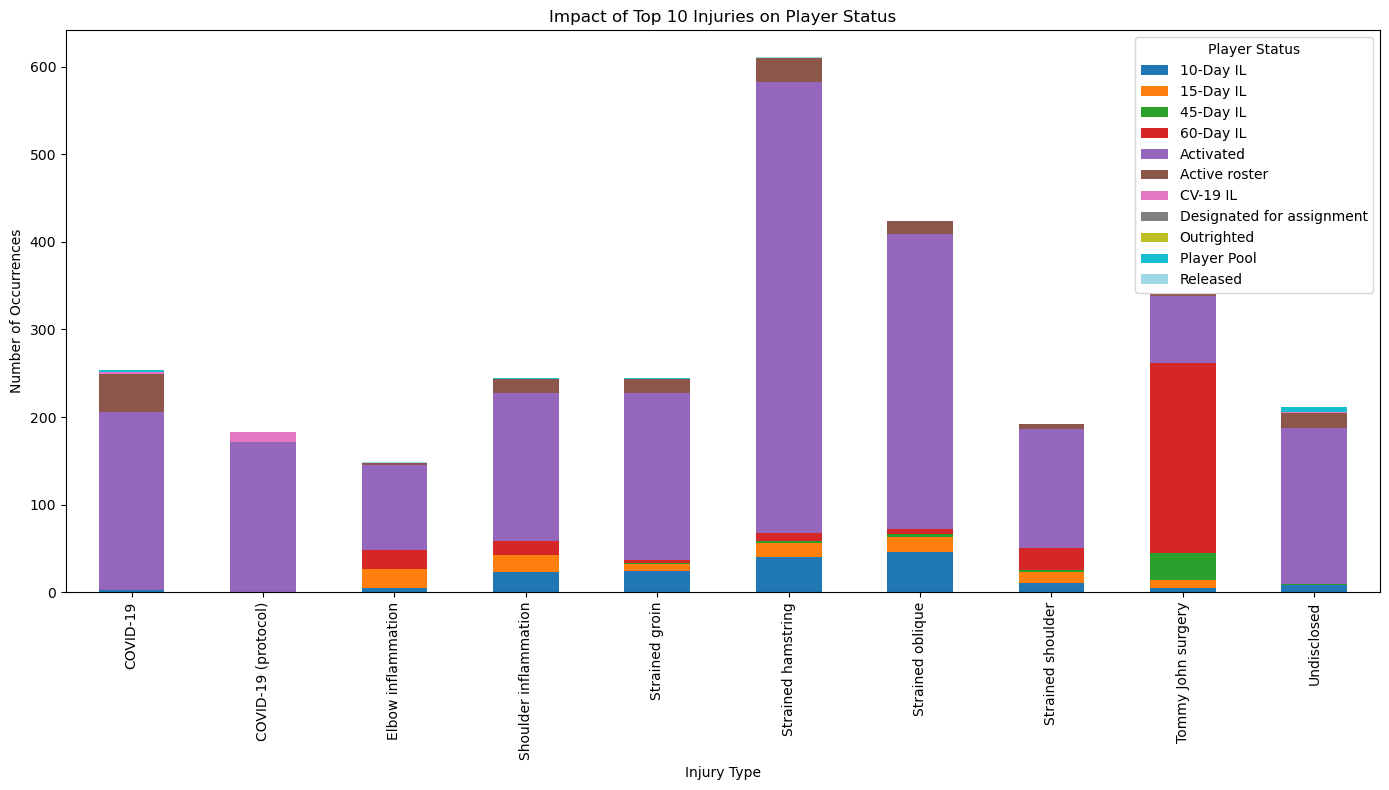

In [67]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data if necessary remove NaN values
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Status'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Status'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Get the top 10 most common injuries
top_injuries = combined_df['Injury / Surgery'].value_counts().head(10).index

# Filter the combined DataFrame to include only the top 10 injuries
top_injuries_df = combined_df[combined_df['Injury / Surgery'].isin(top_injuries)]

# Analyze the relationship between the top 10 injury types and player statuses
# Count the number of occurrences of each injury type and status combination
injury_status_counts = top_injuries_df.groupby(['Injury / Surgery', 'Status']).size().unstack(fill_value=0)

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot a stacked bar chart to show the count of injuries by status for each of the top 10 injury types
injury_status_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Impact of Top 10 Injuries on Player Status')
plt.xlabel('Injury Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Player Status')

plt.tight_layout()
plt.show()

### Injuries based on location


Total injuries by position:
Pos
1B         269.0
1B/3B       22.0
1B/OF       49.0
2B         216.0
2B/OF        4.0
3B         263.0
3B/1B       18.0
3B/OF       10.0
C          297.0
C/1B         2.0
C/OF         2.0
DH          60.0
INF        301.0
INF/OF     259.0
OF        1193.0
OF/1B       78.0
OF/INF      49.0
Of           5.0
RP        1392.0
RP/SP       13.0
SP        2471.0
SP/RP       41.0
SS         336.0
UTL          1.0
dtype: float64


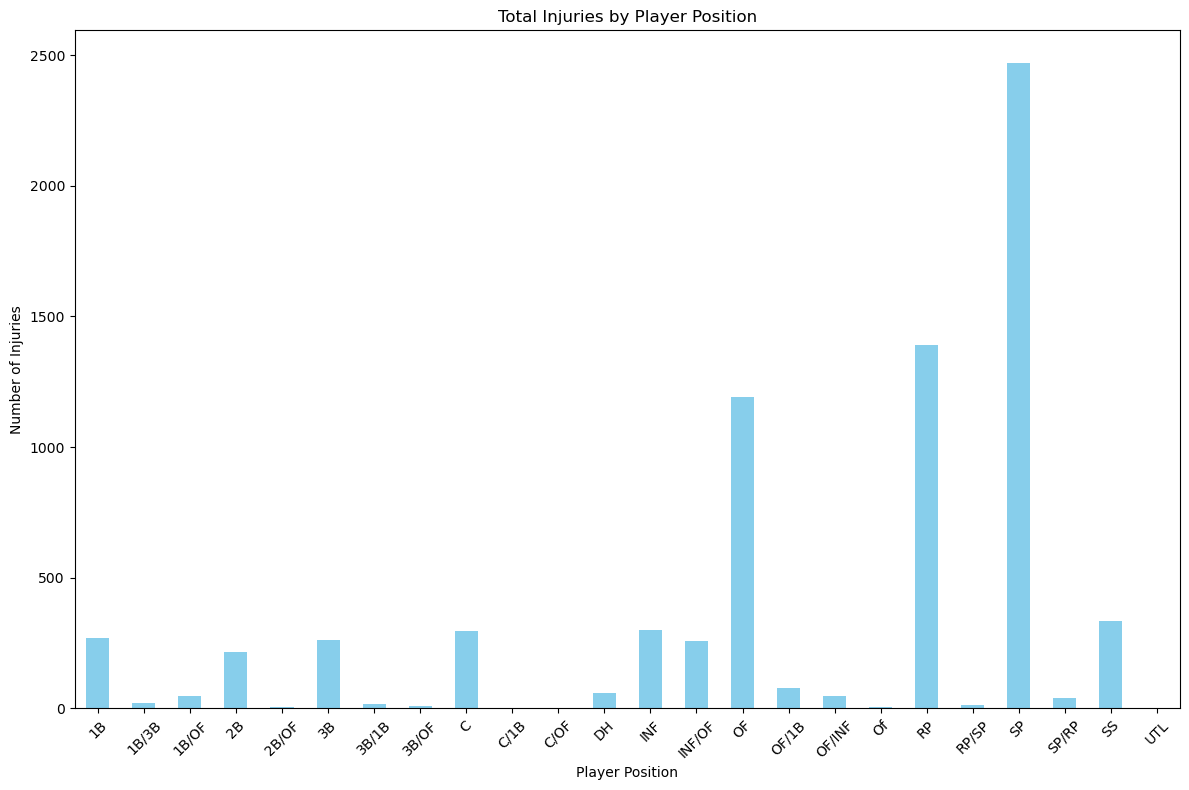

In [76]:
# File paths for the CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Pos'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Pos'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Aggregate data by position and injury type
injuries_by_position = combined_df.groupby('Pos')['Injury / Surgery'].value_counts().unstack().fillna(0)

# Sum injuries of all types for each position
total_injuries_by_position = injuries_by_position.sum(axis=1)

# Debug: Check total injuries by position
print("\nTotal injuries by position:")
print(total_injuries_by_position)

# Plotting the results
plt.figure(figsize=(12, 8))
total_injuries_by_position.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [80]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Inspect the first few rows of the date column
print("First few rows of 'Injury / Surgery Date' in df1:")
print(df1['Injury / Surgery Date'].head())
print("\nFirst few rows of 'Injury / Surgery Date' in df2:")
print(df2['Injury / Surgery Date'].head())

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery Date'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery Date'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Inspect the unique date formats
print("\nUnique values in 'Injury / Surgery Date':")
print(combined_df['Injury / Surgery Date'].unique())

# Convert to datetime, using errors='coerce' to handle invalid dates
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Check if there are still invalid dates
invalid_dates = combined_df[combined_df['Injury / Surgery Date'].isna()]
print("\nRows with invalid dates:")
print(invalid_dates)

# Remove rows with invalid dates
combined_df = combined_df.dropna(subset=['Injury / Surgery Date'])

First few rows of 'Injury / Surgery Date' in df1:
0    09/02/22
1    04/10/21
2         NaN
3         NaN
4    07/25/23
Name: Injury / Surgery Date, dtype: object

First few rows of 'Injury / Surgery Date' in df2:
0    2022-08-23
1    2022-09-28
2    2023-03-14
3    2023-03-22
4    2023-04-12
Name: Injury / Surgery Date, dtype: object

Unique values in 'Injury / Surgery Date':
['09/02/22' '04/10/21' '07/25/23' ... '2020-09-25' '2020-09-29'
 '2020-10-06']


C:\Users\alexi\AppData\Local\Temp\ipykernel_6428\4051378869.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')



Rows with invalid dates:
      player_id  year_x  player_age    hit  single  double  triple  home_run  \
12     446334.0  2020.0        34.0   49.0    31.0    10.0     1.0       7.0   
18     453568.0  2020.0        33.0   67.0    48.0    12.0     1.0       6.0   
61     518692.0  2020.0        30.0   73.0    36.0    23.0     1.0      13.0   
62     518735.0  2020.0        31.0   37.0    22.0     7.0     0.0       8.0   
69     518934.0  2020.0        31.0   71.0    49.0    10.0     2.0      10.0   
...         ...     ...         ...    ...     ...     ...     ...       ...   
3398   624133.0  2024.0        28.0  109.0    71.0    26.0     1.0      11.0   
3432   656288.0  2024.0        28.0  148.0    96.0    24.0     3.0      25.0   
3434   656427.0  2024.0        28.0  117.0    79.0    12.0     5.0      21.0   
3493   668678.0  2024.0        28.0  116.0    75.0    27.0     5.0       9.0   
3531   678394.0  2024.0        25.0  143.0    95.0    29.0     0.0      19.0   

      strikeo

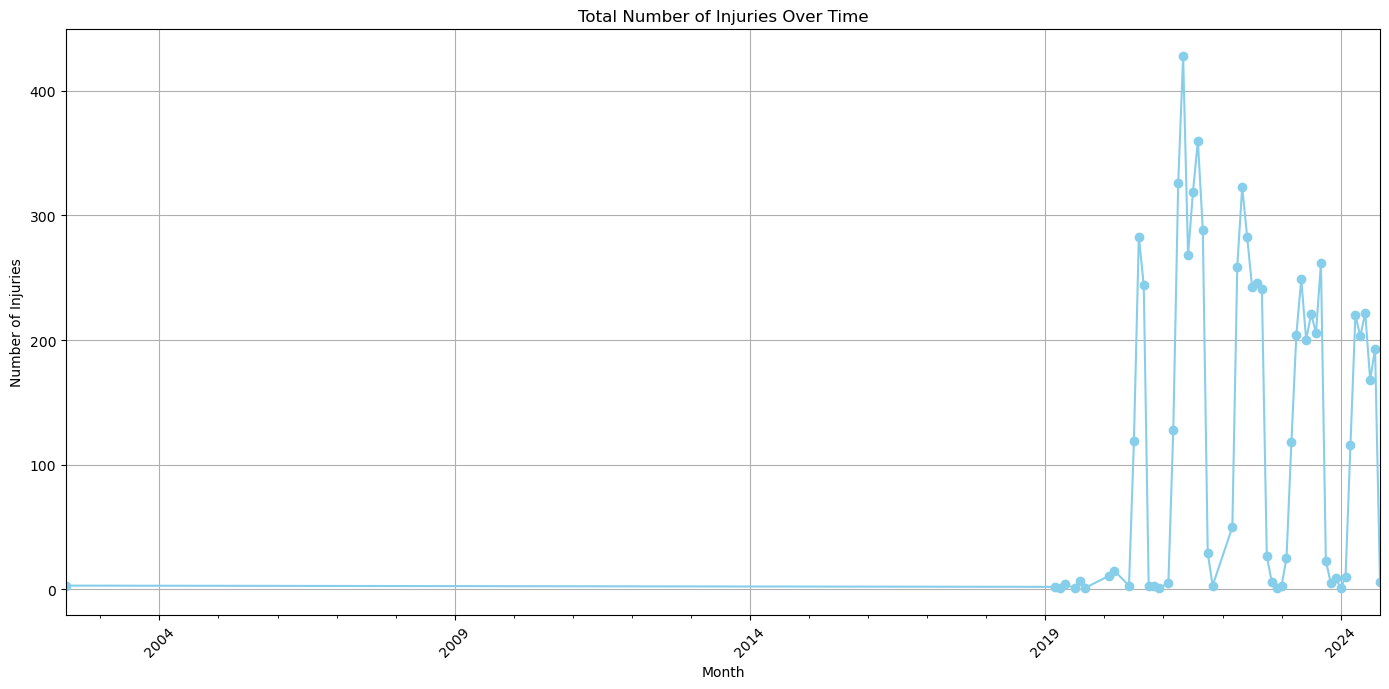

In [81]:
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year
combined_df['Month'] = combined_df['Injury / Surgery Date'].dt.to_period('M')

# Count the number of injuries per month
injuries_per_month = combined_df.groupby('Month').size()

# Plotting the results
plt.figure(figsize=(14, 7))
injuries_per_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Number of Injuries Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()